# Digital signal processing - 4

| ** Title ** | Digital signal processing |
| --- | --- |
| ** Author ** | Alexander Kapitanov |
| ** Contact ** | sallador@bk.ru |
| ** Project lang ** | Python |
| ** Packages ** | numpy, scipy, matplotlib |
| ** License ** | GNU GPL 3.0 |


## Introduction

Here is a tutorial on the basics of ** digital signal processing ** using the Python programming language. It is assumed that the reader has basic knowledge of higher mathematics, as well as knows the Python language and at least superficially knows various python libraries - numpy / scipy, matplotlib and others.

For MATLAB / GNU Octave users, mastering the material from the point of view of the program code will not be difficult, since the main functions and their attributes are largely identical and similar to methods from python libraries.

## Signals

In the previous parts, we learned that * a signal * is a physical process, the parameters of which change in accordance with the transmitted message. Signals are - * random * and * deterministic *.

** A random ** signal is a function of time, the values ​​of which are unknown in advance and can be predicted only with a certain * probability *. The main characteristics of random signals are:

* distribution law (relative residence time of the signal value in a certain interval),
* spectral power distribution.


Random signals are divided into two classes: 1) noises - random vibrations consisting of a set of different frequencies and amplitudes, 2) signals carrying information, for which processing requires resorting to probabilistic methods.

Random signals are characterized by a ** probability density **. The probability density is one of the ways to define the distribution of random variables. The probability density is a non-negative function for any values ​​of the discrete signal. For analog random signals, the integral of the signal function over the entire range of values ​​tends to unity. For discrete random variables ** there is no probability density function, since a discrete random variable is not a continuous function. However, the mathematical apparatus allows you to calculate the approximate values ​​of the function.

Simple examples of discrete random variables:
- the number of heads dropped and the number of tails dropped when the coin is thrown countably N times,
- the number of hits on the target with a limited number of shots.
- measurement errors of devices

## Random signals

The probability density of a random signal allows us to determine mathematical moments of different orders:

- ** Expected value **: average value of a sequence of random variables

$m = \frac{1}{N}\sum_{n=0}^{N-1}x(n)$

In signal theory, the mathematical expectation is often understood as the level offset of a signal relative to zero (constant component).

In python, the `mean()` method is used to calculate the mean

- ** Variance **: the mean of the squared differences between the values of the sequence and its mean

$\sigma^2 = \frac{1}{N-1}\sum_{n=0}^{N-1}|x(n) - m|^{2}$ 

The term ** standard deviation ** is often used in the literature. This value is equal to the square root of the signal variance.

In python, the var() method is used to calculate the variance, and the std() method is used to find the standard deviation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, rfft

%matplotlib inline

Random discrete signal with $ N = 100000 $ samples and its probability density:

Mean of the signal: -0.032692104037689
Std. of the signal: 10.020365002664889


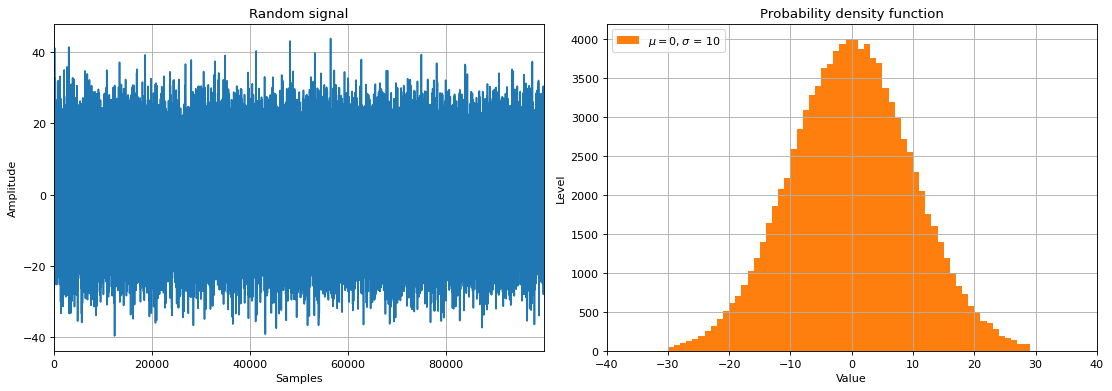

In [2]:
N = 100000

# Random signal
m, s = 0, 10
np.random.seed(2)
sig = np.random.normal(m, s, N)

# Create hist for PDF
hist, _ = np.histogram(sig, bins=list(range(0, 256)))

# Plot figure
fig = plt.figure(1, figsize=(14, 5), dpi=80)
plt.subplot(1, 2, 1)
plt.title('Random signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(sig, color='C0')
plt.xlim([0, N-1])
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Probability density function')
plt.xlabel('Value')
plt.ylabel('Level')
plt.xlim([-4*s, 4*s])
plt.hist(sig, bins=list(range(-s*3, s*3)), color='C1', label=r'$\mu = %d, \sigma$ = %d' % (m, s))
plt.grid()
plt.legend(loc='upper left')
plt.tight_layout()

print('Mean of the signal:', np.mean(sig))
print('Std. of the signal:', np.std(sig))

### Normal distribution

According to the ** central limit theorem **, the sum of a large number of weakly dependent random variables has a distribution close to ** normal **. At the same time, random variables are distributed within a certain scale, that is, none of the values makes a significant contribution to the final amount.

Normal distribution (Gaussian distribution) - the probability distribution, which is given by the function:

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{- \frac{(x-\mu)^2}{2\sigma^2}}$

where $ \mu $ is the mathematical expectation (mean value of a random process), and $ \sigma $ is the standard deviation.

The normal distribution is considered ** standard ** if $ \mu = 0, \sigma = 1 $.

#### Three Sigma Rule $ 3 \sigma $

The rule of three sigma states that with a probability of $ P = 0.997 $, the values ​​of a normally distributed sequence lie in the range of three times the standard deviation. In other words, almost all values ​​of the random process lie in the three sigma interval, that is, in the $ (x-3 \sigma, x + 3 \sigma) $ range.

Below are graphs of the probability density and the distribution function of the normal distribution law for various parameters of the mathematical expectation and variance.

The plotting uses the `norm(mu, sigma)` method from the `numpy.stats` package, not the` randn() `function from the` numpy.random` package. This is due to the fact that `norm()` returns an object that has methods PDF - probability density and CDF - distribution function of a random variable.


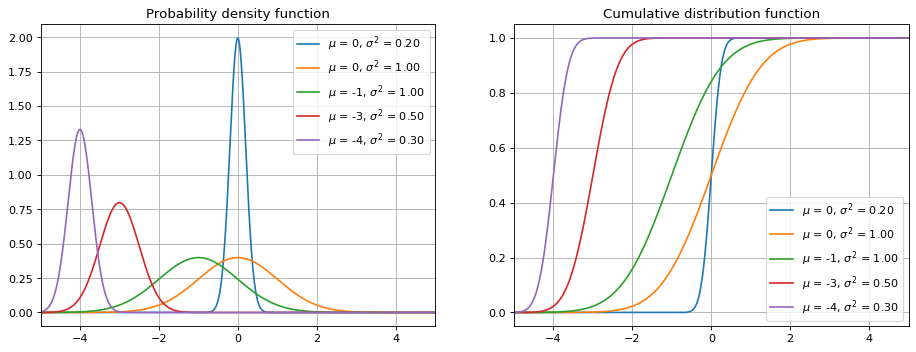

In [3]:
from scipy.stats import norm

# Gaussian parameters
mu = [0, 0, -1, -3, -4]
sg = [0.2, 1, 1, 0.5, 0.3]

# Create Normal distributions
pxn = [norm(mu[i], sg[i]) for i in range(5)]

tt = np.linspace(-5, 5, N)
# Plot PDF and CDF
fig = plt.figure(1, figsize=(14, 5), dpi=80)

plt.subplot(1,2,1)
plt.title('Probability density function')
for i in range(5):
    plt.plot(tt, pxn[i].pdf(tt), color='C'+str(i), markersize=2, label='$\mu$ = %d, $\sigma^2$ = %0.2f' % (mu[i], sg[i]))
plt.legend(loc='upper right')
plt.xlim([-5, 5])
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Cumulative distribution function')
for i in range(5):
    plt.plot(tt, pxn[i].cdf(tt), color='C'+str(i), markersize=2, label='$\mu$ = %d, $\sigma^2$ = %0.2f' % (mu[i], sg[i]))
plt.legend(loc='lower right')
plt.xlim([-5, 5])
plt.grid(True)

### Length of random process

Based on the central limit theorem, the longer the duration of a random process, the more it resembles a normal (Gaussian) distribution. It can be shown that with increasing signal length, the probability density function tends to the normal distribution function.

Let's set the length of the random sequence $ N = 100, 1000, 10000, 100000 $ samples. The graphs below show how the length of the random process affects the shape of the probability density graph.

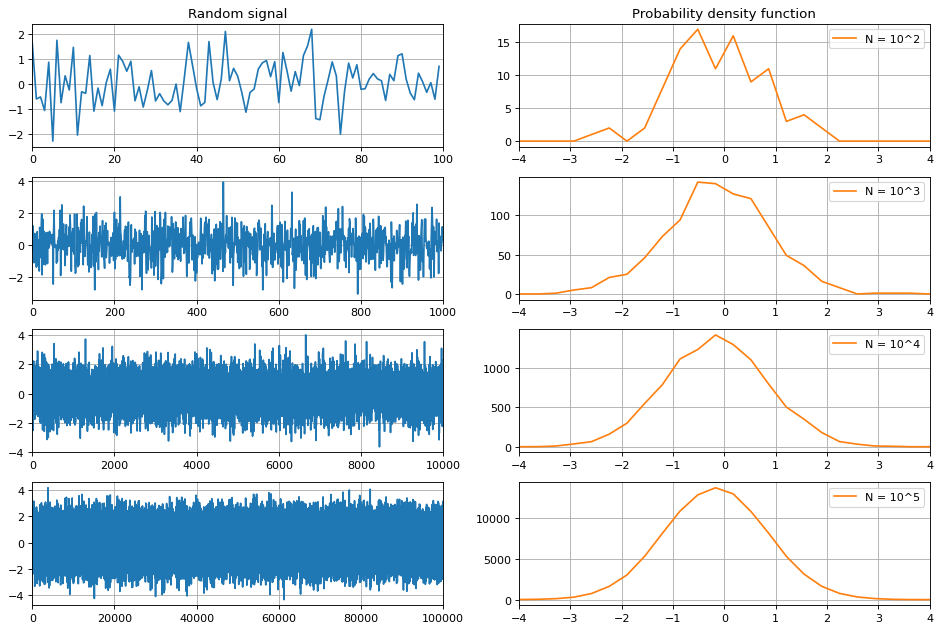

In [4]:
N = 10 ** np.arange(2,6)

# Set random seed
np.random.seed(1)

plt.figure(figsize=(12, 8), dpi=80)
for i in range(len(N)):

    # create random signal
    dat = np.random.normal(size=N[i])
    # hist and bins
    hist, bins = np.histogram(dat, np.linspace(-5, 5, 30))
    # probability density function
    pdf = norm.pdf(bins)
    
    plt.subplot(len(N), 2, 2*i+1)
    if i == 0:
        plt.title('Random signal')
    plt.plot(dat)
    plt.xlim([0, dat.size])
    plt.grid(True)
    
    plt.subplot(len(N), 2, 2*i+2)
    if i == 0:
        plt.title('Probability density function')
    plt.plot(bins[:-1], hist, color='C1', label='N = 10^{}'.format(int(np.log10(N[i]))))
    plt.xlim([-4, 4])
    plt.legend(loc='upper right')
    plt.grid(True)
plt.tight_layout()

### Python Random library

The numpy Python library contains a ** random ** package that contains a set of mathematical statistics functions. To import a package into a project, run the command:

```python
from numpy.random import *
# or
import numpy as np
```

In addition, scipy contains the ** stats ** package, which augments (and partially overrides) the functionality of the random package. Here is a list of the main functions from the random package:

| ** Function ** | ** Description ** |
| --- | --- |
| `rand(d0, d1, ..., dn)` | Uniform distribution (returns an N-dimensional array) |
| `randn(d0, d1, ..., dn)` | Standard Normal Distribution (returns an N-dimensional array) |
| `randint(low [, high, size, dtype])` | Array of integer values ​​in the specified range |
| `random([size])` | Uniform distribution in the range $ [0.0, 1.0) $ |
| `shuffle(x)` | Rearranging Sequence Elements On The Fly |
| `permutation(x)` | Rearranging array elements or returning their indices |
| `normal([loc, scale, size])` | Array of random numbers distributed according to the normal law |
| `pareto(a [, size])` | Array of random numbers distributed according to the Pareto law |
| `poisson([lam, size])` | Array of random numbers distributed according to Poisson's law |
| `rayleigh([scale, size])` | Array of random numbers distributed according to the Rayleigh law |
| `seed([seed])` | Pseudo Random Variable Initialization |

____

In problems of digital signal processing, random processes play an important role. Using random variables, it is possible to simulate the effect of a real environment on the passage of a signal from a source to a data receiver. Often, when the signal passes through some noisy link, so-called ** white noise ** is added to the signal. As a rule, the spectral density of such noise is uniformly (equally) distributed at all frequencies, and the noise values ​​in the time domain are distributed normally (Gaussian distribution law). Because white noise is physically added to the signal amplitudes at selected times, it is called ** additive **. Thus, the main source of noise is called * Additive white Gaussian noise * (AWGN - Additive white Gaussian noise).

It should be noted that the term * white * is related to the fact that the spectral components are evenly distributed over the entire frequency range. The study of the peculiarities of noise is beyond the scope of this material, but in subsequent lectures it is planned to return to the issues of the influence of noise on the processes in devices, in particular in digital ones. Since the frequency values ​​are evenly distributed, the autocorrelation function (ACF) of white noise ideally tends to the ** delta function **.

Let's give a graph of white noise in the time domain, and also plot its ACF. Let's use the `randn ()` function from the * random * package as a white noise generator

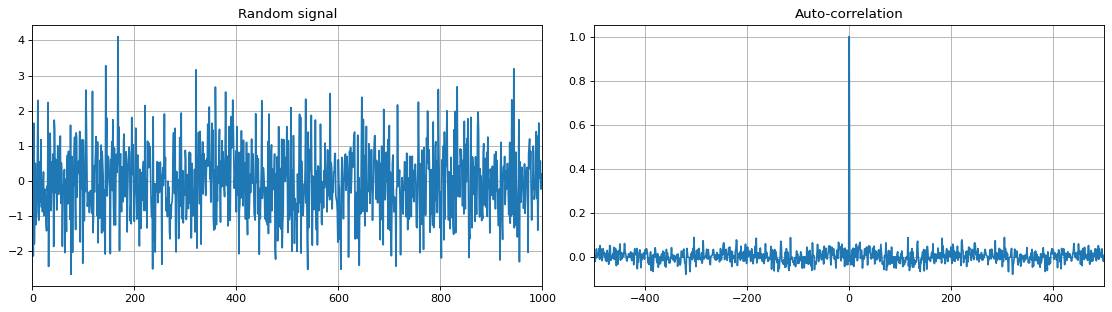

In [5]:
# Auto-correlation function
def auto_corr(x):
    res = np.correlate(x, x, mode='same')
    return res / np.max(res)

N = 1000
# Random signal
np.random.seed(2)
dat = np.random.randn(N)

# ACF: Auto-correlation
cfx = auto_corr(dat)

plt.figure(figsize=(14, 4), dpi=80)
plt.subplot(1, 2, 1)
plt.title('Random signal')
plt.plot(dat)
plt.xlim([0, dat.size])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Auto-correlation')
plt.plot(np.linspace(-N//2, N//2, N), cfx)
plt.xlim([-N//2, N//2])
plt.grid(True)
plt.tight_layout()